### Lab 7 + 8

In [42]:
# Necessary imports 
import pickle
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import statistics
import math

In [43]:
# Loading data
labels = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

higgs = open('higgs_100000_pt_1000_1200.pkl', 'rb')
higgs_file = pickle.load(higgs)
higgs_file

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1081.930827,-0.292886,-0.066601,128.449819,0.062010,0.000188,0.788336,0.000623,0.984561,0.132130,0.106621,0.134201,0.806947,0.223551
99996,1114.171856,-0.071148,-0.518420,128.133729,0.060090,0.000269,1.239701,0.000745,0.863711,0.297420,0.248208,0.344352,0.834536,0.224712
99997,1066.593095,0.776745,-2.067399,125.351507,0.063063,0.000260,1.036221,0.000161,1.545428,0.230121,0.177881,0.148904,0.772991,0.231622
99998,1043.746312,-0.403642,1.761954,125.477362,0.065217,0.000204,0.736390,0.000253,1.147794,0.208940,0.162744,0.182036,0.778902,0.222911


In [4]:
qcd = open('qcd_100000_pt_1000_1200.pkl', 'rb')
qcd_file = pickle.load(qcd)
qcd_file

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1185.924965,-1.282700,-2.203558,178.917178,0.051779,0.000606,4.368135,0.000900,0.671057,0.294523,0.255893,0.438894,0.868838,0.282015
99996,1070.385446,-0.762397,-2.405166,143.872351,0.032136,0.000224,6.749812,0.002829,0.718651,0.293553,0.268076,0.408478,0.913209,0.261662
99997,1116.722590,-0.166511,-1.141038,118.185074,0.049617,0.000331,2.712970,0.002456,0.859900,0.642900,0.456476,0.747645,0.710027,0.147913
99998,1147.609045,0.405501,-1.125710,292.925318,0.129771,0.004310,1.972101,0.005786,0.930685,0.672938,0.361115,0.723057,0.536624,0.567817


### Problem 7.1: Stacked histogram plot for feature variable: mass

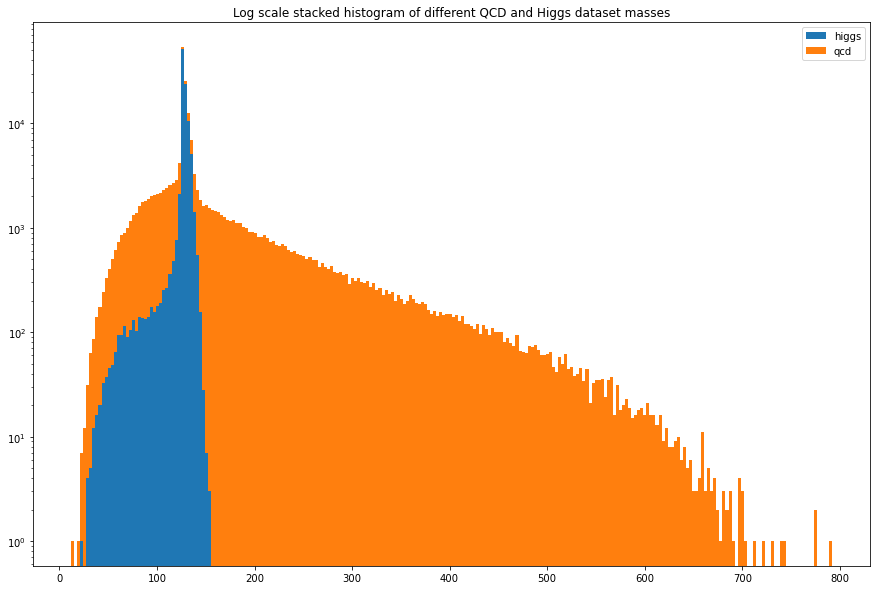

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.set_yscale('log')
ax.hist([higgs_file['mass'],qcd_file['mass']], stacked=True, bins = 250, label=["higgs", "qcd"])
ax.set_title("Log scale stacked histogram of different QCD and Higgs dataset masses")
ax.legend()

In [11]:
n_higgs = 50
n_qcd = 2000
poisson_sigma = stats.poisson.cdf(n_higgs + n_qcd, n_qcd)
poisson_sig = stats.norm.ppf(poisson_sigma)
print("The significance calculation using Poisson statistics: " + str(poisson_sig))

The significance calculation using Poisson statistics: 1.1282230087754428


In [12]:
sig = n_higgs / np.sqrt(n_qcd)
print("The significance calculation using the approximation ratio:" + str(sig))

The significance calculation using the approximation ratio:1.118033988749895


In [13]:
print("The difference between the two significances: " + str(poisson_sig - sig))

The difference between the two significances: 0.01018902002554789


The difference between the approximation and the Poisson calculation is incredibly small.

### Problem 7.2: Identifying mass cuts to optimize expected significance

To identify the most meaningful mass cuts, I first want to calculate the mean.

In [14]:
np.mean(higgs_file["mass"])

126.66383222477353

Next, I will systematically check cuts around the region where the mean lies.

In [15]:
def sig_calc(min, max):
    qcd_temp = np.array(qcd_file["mass"])
    higgs_temp = np.array(higgs_file["mass"])
    n_qcd = np.size(qcd_temp[np.where((qcd_temp >= min) & (qcd_temp <= max))])
    n_higgs = np.size(higgs_temp[np.where((higgs_temp >= min) & (higgs_temp <= max))])
    #put back into our ratio of 50 to 2000
    sig = ((n_higgs / 100000) * 50) / np.sqrt((n_qcd / 100000) * 2000)
    return sig

In [16]:
print("Significance between 120, 129 = " + str(sig_calc(123, 129)))
print("Significance between 123, 131 = " + str(sig_calc(123, 131)))
print("Significance between 123, 130 = " + str(sig_calc(123, 130)))
print("Significance between 123, 129 = " + str(sig_calc(123, 129)))
print("Significance between 123, 128 = " + str(sig_calc(123, 128)))
print("Significance between 123, 127 = " + str(sig_calc(123, 127)))
print()
print("Significance between 116.5, 131.5 = " + str(sig_calc(116.5, 131.5)))
print("Significance between 120, 130 = " + str(sig_calc(120, 130)))
print("Significance between 121, 130 = " + str(sig_calc(121, 130)))
print("Significance between 122, 130 = " + str(sig_calc(122, 130)))
print("Significance between 123, 130 = " + str(sig_calc(123, 130)))
print("Significance between 124, 130 = " + str(sig_calc(124, 130)))
print("Significance between 125, 130 = " + str(sig_calc(125, 130)))
print("Significance between 126, 130 = " + str(sig_calc(126, 130)))
print()
print("Significance between 120, 129 = " + str(sig_calc(120, 129)))
print("Significance between 121, 129 = " + str(sig_calc(121, 129)))
print("Significance between 122, 129 = " + str(sig_calc(122, 129)))
print("Significance between 123, 129 = " + str(sig_calc(123, 129)))
print("Significance between 124, 129 = " + str(sig_calc(124, 129)))
print("Significance between 125, 129 = " + str(sig_calc(125, 129)))
print("Significance between 126, 129 = " + str(sig_calc(126, 129)))
print()
print("Significance between 120, 128 = " + str(sig_calc(120, 128)))
print("Significance between 121, 128 = " + str(sig_calc(121, 128)))
print("Significance between 122, 128 = " + str(sig_calc(122, 128)))
print("Significance between 123, 128 = " + str(sig_calc(123, 128)))
print("Significance between 124, 128 = " + str(sig_calc(124, 128)))
print("Significance between 125, 128 = " + str(sig_calc(125, 128)))
print("Significance between 126, 128 = " + str(sig_calc(126, 128)))

Significance between 120, 129 = 3.926243676981313
Significance between 123, 131 = 3.901028615254701
Significance between 123, 130 = 3.943137907471722
Significance between 123, 129 = 3.926243676981313
Significance between 123, 128 = 3.7569373078284096
Significance between 123, 127 = 3.3216564279060092

Significance between 116.5, 131.5 = 2.940292875912613
Significance between 120, 130 = 3.3475406344693024
Significance between 121, 130 = 3.514016524481035
Significance between 122, 130 = 3.704557305085909
Significance between 123, 130 = 3.943137907471722
Significance between 124, 130 = 4.225651989421637
Significance between 125, 130 = 4.2380247446446635
Significance between 126, 130 = 3.2052314594317215

Significance between 120, 129 = 3.255606631027935
Significance between 121, 129 = 3.4378239320496053
Significance between 122, 129 = 3.651060377175072
Significance between 123, 129 = 3.926243676981313
Significance between 124, 129 = 4.267241718150673
Significance between 125, 129 = 4.3354

Looking at the different cuts, we can observe that the signifcance between 125 and 129 gives the highest significance of 4.3354.

### Problem 7.3: Two sets of histogram plots

Set A: Plots with no event selection:

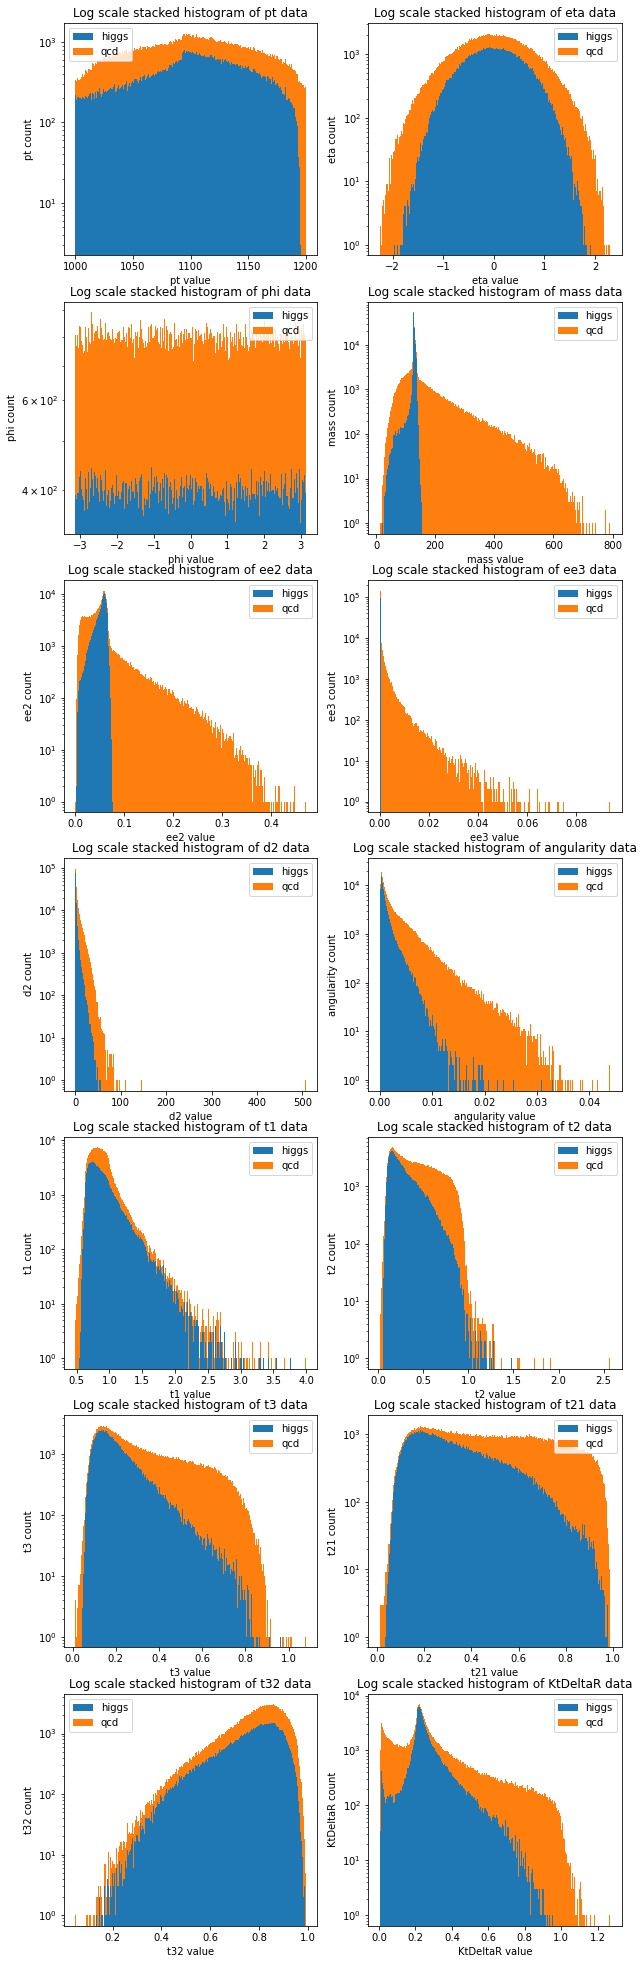

In [17]:
fig, ax = plt.subplots(7, 2, figsize = (5*2, 5*7))
i = 0;
for j in range(7):
    ax[j][0].hist([higgs_file[labels[i]],qcd_file[labels[i]]], stacked=True, bins = 250,label=["higgs", "qcd"])
    ax[j][0].set_title("Log scale stacked histogram of " + str(labels[i]) + " data")
    ax[j][0].set_yscale('log')
    ax[j][0].set_xlabel(str(labels[i] + " value"))
    ax[j][0].set_ylabel(str(labels[i] + " count"))
    ax[j][0].legend()
    i = i + 1;
    ax[j][1].hist([higgs_file[labels[i]],qcd_file[labels[i]]], stacked=True, bins = 250,label=["higgs", "qcd"])
    ax[j][1].set_title("Log scale stacked histogram of " + str(labels[i]) + " data")
    ax[j][1].set_yscale('log')
    ax[j][1].set_xlabel(str(labels[i] + " value"))
    ax[j][1].set_ylabel(str(labels[i] + " count"))
    ax[j][1].legend()
    i = i + 1;

Set B: Plots with optimal mass cuts (125, 129):

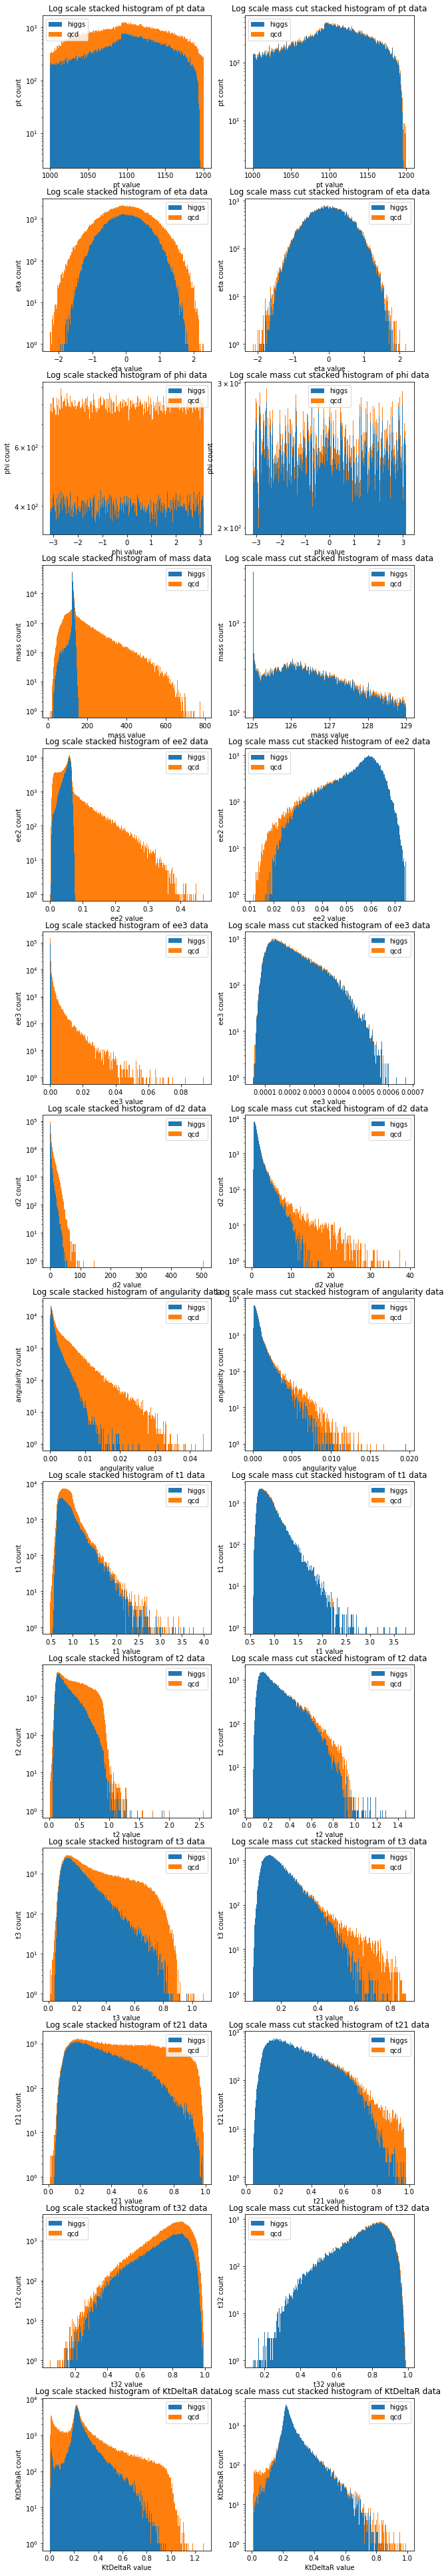

In [18]:
qcd_mask = (qcd_file['mass'] > 125) & (qcd_file['mass'] < 129)
higgs_mask = (higgs_file['mass'] > 125) & (higgs_file['mass'] < 129)
fig, ax = plt.subplots(14, 2, figsize = (5*2, 5*14))
i = 0;
for j in range(14):
    ax[j][0].hist([higgs_file[labels[i]],qcd_file[labels[i]]], stacked=True, bins = 250,label=["higgs", "qcd"])
    ax[j][0].set_title("Log scale stacked histogram of " + str(labels[i]) + " data")
    ax[j][0].set_yscale('log')
    ax[j][0].set_xlabel(str(labels[i] + " value"))
    ax[j][0].set_ylabel(str(labels[i] + " count"))
    ax[j][0].legend()
    ax[j][1].hist([higgs_file[labels[i]][higgs_mask], qcd_file[labels[i]][qcd_mask]], stacked=True, bins = 250,label=["higgs", "qcd"])
    ax[j][1].set_title("Log scale mass cut stacked histogram of " + str(labels[i]) + " data")
    ax[j][1].set_yscale('log')
    ax[j][1].set_xlabel(str(labels[i] + " value"))
    ax[j][1].set_ylabel(str(labels[i] + " count"))
    ax[j][1].legend()
    i = i + 1;

Comparing the plots from sets A and B, we can see obvious improvements from the mass cut plots in set B.

### Problem 7.4: Optimize event selections with multiple features

From lookings at the plots, I chose to optimize the t3 data. Following the steps from the previous problem:

In [20]:
print(np.mean(higgs_file['t3'])) # mean calculation

0.20814654833285287


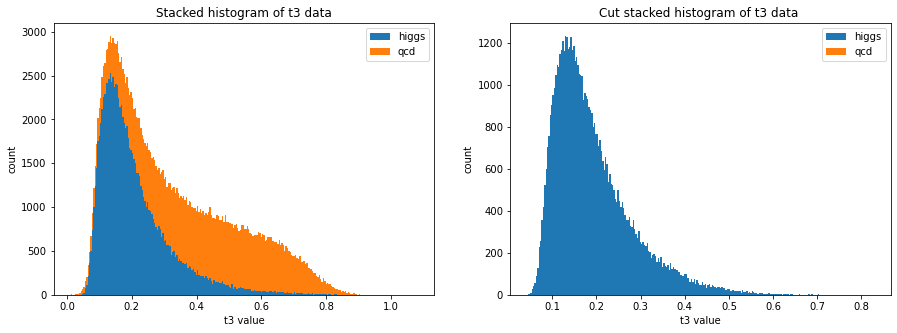

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist([higgs_file['t3'],qcd_file['t3']], stacked=True, bins = 250, label=["higgs", "qcd"])
ax[0].set_title("Stacked histogram of t3 data")
ax[0].set_xlabel("t3 value")
ax[0].set_ylabel("count")
ax[0].legend()

t3_h_mask = (higgs_file['t3'][higgs_mask] > 0) & (higgs_file['t3'][higgs_mask] < 1.0)
t3_q_mask = (qcd_file['t3'][qcd_mask] > 0) & (qcd_file['t3'][qcd_mask] < 1.0)

ax[1].hist([higgs_file['t3'][higgs_mask][t3_h_mask], qcd_file['t3'][qcd][t3_q_mask]], bins = 250, stacked=True, label=['higgs', 'qcd'])
ax[1].set_title("Cut stacked histogram of t3 data ")
ax[1].set_xlabel("t3 value")
ax[1].set_ylabel("count")
ax[1].legend()

In [22]:
def t3_sig_calc(min, max):
    qcd_temp = np.array(qcd_file["t3"])
    higgs_temp = np.array(higgs_file["t3"])
    n_qcd = np.size(qcd_temp[np.where((qcd_temp >= min) & (qcd_temp <= max))])
    n_higgs = np.size(higgs_temp[np.where((higgs_temp >= min) & (higgs_temp <= max))])
    #put back into our ratio of 50 to 2000
    sig = ((n_higgs / 100000) * 50) / np.sqrt((n_qcd / 100000) * 2000)
    return sig

In [23]:
print("Significance between 0.05, 0.6 = " + str(t3_sig_calc(0.05, 0.6)))
print("Significance between 0.05, 0.5 = " + str(t3_sig_calc(0.05, 0.5)))
print("Significance between 0.05, 0.4 = " + str(t3_sig_calc(0.05, 0.4)))
print("Significance between 0.05, 0.3 = " + str(t3_sig_calc(0.05, 0.3)))
print("Significance between 0.05, 0.2 = " + str(t3_sig_calc(0.05, 0.2)))
print("Significance between 0.05, 0.1 = " + str(t3_sig_calc(0.05, 0.1)))
print()
print("Significance between 0.25, 0.3 = " + str(t3_sig_calc(0.25, 0.3)))
print("Significance between 0.20, 0.3 = " + str(t3_sig_calc(0.20, 0.3)))
print("Significance between 0.15, 0.3 = " + str(t3_sig_calc(0.15, 0.3)))
print("Significance between 0.10, 0.3 = " + str(t3_sig_calc(0.10, 0.3)))
print("Significance between 0.05, 0.3 = " + str(t3_sig_calc(0.05, 0.3)))
print("Significance between 0.04, 0.3 = " + str(t3_sig_calc(0.04, 0.3)))
print("Significance between 0.03, 0.3 = " + str(t3_sig_calc(0.03, 0.3)))

Significance between 0.05, 0.6 = 1.2459756238462667
Significance between 0.05, 0.5 = 1.3725825570749501
Significance between 0.05, 0.4 = 1.5453209288130212
Significance between 0.05, 0.3 = 1.7525181626775062
Significance between 0.05, 0.2 = 1.8303186688772854
Significance between 0.05, 0.1 = 0.6518660197992562

Significance between 0.25, 0.3 = 0.3751549601117456
Significance between 0.20, 0.3 = 0.7011425715875949
Significance between 0.15, 0.3 = 1.1536563679743754
Significance between 0.10, 0.3 = 1.6383609319173484
Significance between 0.05, 0.3 = 1.7525181626775062
Significance between 0.04, 0.3 = 1.749894820258818
Significance between 0.03, 0.3 = 1.7491331685055402


We can observe that the .05 to .2 range has the highest signifcance of 1.830

### Problem 8.1: High luminosity data

In [37]:
hf = h5py.File('data_highLumi_pt_1000_1200.h5', 'r')

In [38]:
hf.keys()

<KeysViewHDF5 ['data']>

In [39]:
hf['data']['block0_items'][:]

array([b'pt', b'eta', b'phi', b'mass', b'ee2', b'ee3', b'd2',
       b'angularity', b't1', b't2', b't3', b't21', b't32', b'KtDeltaR'],
      dtype='|S10')

In [27]:
high_lumin = np.array(hf.get('data').get('block0_values'))
hf.close() 

'mass' is the 4th item in the array, and t3 is the 13th item in the array. Using the t3 data:

Text(0.5, 1.0, 'Mass cut overlapped log scale mass data')

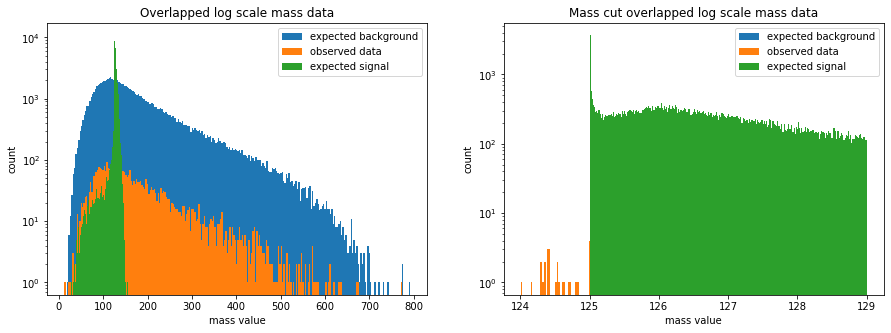

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(qcd_file['mass'], bins = 250, label= "expected background")
ax[0].hist(high_lumin[:,3], bins = 250, label = "observed data")
ax[0].hist(higgs_file['mass'], bins = 250, label= "expected signal" )
ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_xlabel("mass value")
ax[0].set_ylabel("count")
ax[0].set_title("Overlapped log scale mass data")


high_lumin_mask = (high_lumin[:,3] > 124) & (high_lumin[:,3] < 129)
ax[1].hist(qcd_file['mass'][qcd_mask], bins = 250, label= "expected background")
ax[1].hist(high_lumin[:,3][high_lumin_mask], bins = 250, label = "observed data")
ax[1].hist(higgs_file['mass'][higgs_mask], bins = 250, label= "expected signal" )
ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_xlabel("mass value")
ax[1].set_ylabel("count")
ax[1].set_title("Mass cut overlapped log scale mass data")

Observed data overlapped with expected signal and background with/without event selection:

Text(0.5, 1.0, 't3 cut overlapped log scale t3 data')

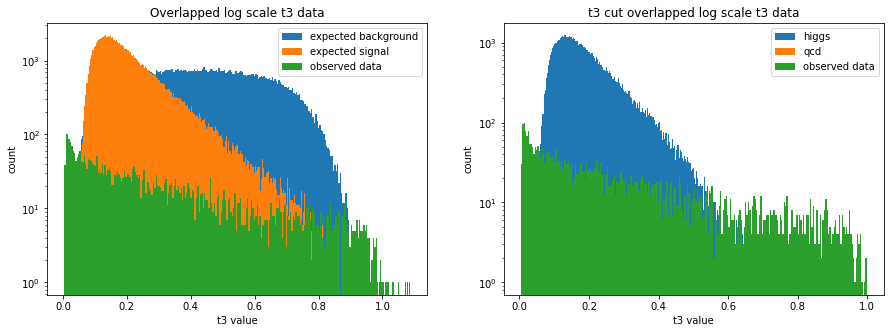

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(qcd_file['t3'], bins = 250, label= "expected background")
ax[0].hist(higgs_file['t3'], bins = 250, label= "expected signal" )
ax[0].hist(high_lumin[:,13], bins = 250, label = "observed data")
ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_ylabel("count")
ax[0].set_xlabel("t3 value")
ax[0].set_title("Overlapped log scale t3 data")

high_lumin_mask2 = (high_lumin[:,13] > 0) & (high_lumin[:,13] < 1.0)
ax[1].hist([higgs_file['t3'][higgs_mask][t3_h_mask], qcd_file['t3'][qcd][t3_q_mask]], bins = 250, stacked=True, label=['higgs', 'qcd'])
ax[1].hist(high_lumin[:,13][high_lumin_mask2], bins = 250, label = "observed data")
ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_ylabel("count")
ax[1].set_xlabel("t3 value")
ax[1].set_title("t3 cut overlapped log scale t3 data")

### Problem 8.2: Low luminosity data:

In [40]:
hf = h5py.File('data_lowLumi_pt_1000_1200.h5', 'r')
hf.keys()
low_lumin = np.array(hf.get('data').get('block0_values'))
hf.close()

Following the same procedure as the previous problem:

Text(0.5, 1.0, 'Mass cut overlapped log scale mass data')

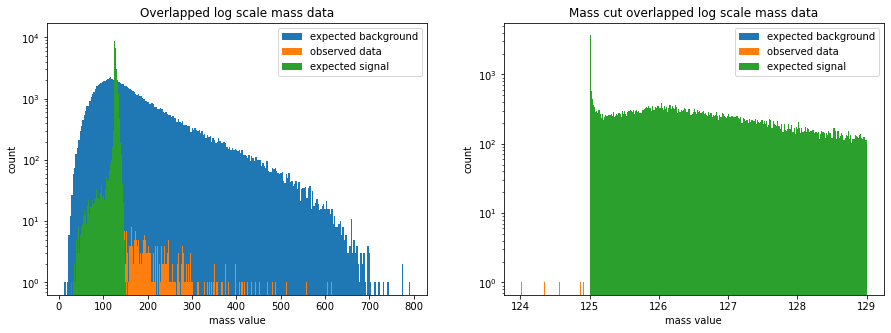

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(qcd_file['mass'], bins = 250, label= "expected background")
ax[0].hist(low_lumin[:,3], bins = 250, label = "observed data")
ax[0].hist(higgs_file['mass'], bins = 250, label= "expected signal" )
ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_xlabel("mass value")
ax[0].set_ylabel("count")
ax[0].set_title("Overlapped log scale mass data")


low_lumin_mask = (low_lumin[:,3] > 124) & (low_lumin[:,3] < 129)
ax[1].hist(qcd_file['mass'][qcd_mask], bins = 250, label= "expected background")
ax[1].hist(low_lumin[:,3][low_lumin_mask], bins = 250, label = "observed data")
ax[1].hist(higgs_file['mass'][higgs_mask], bins = 250, label= "expected signal" )
ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_xlabel("mass value")
ax[1].set_ylabel("count")
ax[1].set_title("Mass cut overlapped log scale mass data")

Text(0.5, 1.0, 't3 cut overlapped log scale t3 data')

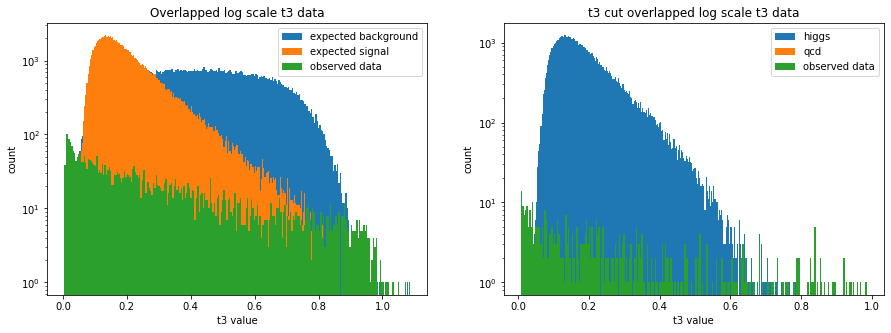

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(qcd_file['t3'], bins = 250, label= "expected background")
ax[0].hist(higgs_file['t3'], bins = 250, label= "expected signal" )
ax[0].hist(high_lumin[:,13], bins = 250, label = "observed data")
ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_ylabel("count")
ax[0].set_xlabel("t3 value")
ax[0].set_title("Overlapped log scale t3 data")

low_lumin_mask2 = (low_lumin[:,13] > 0) & (low_lumin[:,13] < 1.0)
ax[1].hist([higgs_file['t3'][higgs_mask][t3_h_mask], qcd_file['t3'][qcd][t3_q_mask]], bins = 250, stacked=True, label=['higgs', 'qcd'])
ax[1].hist(low_lumin[:,13][low_lumin_mask2], bins = 250, label = "observed data")
ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_ylabel("count")
ax[1].set_xlabel("t3 value")
ax[1].set_title("t3 cut overlapped log scale t3 data")

### Problem 8.3: 95% Confidence level of signal yields

Unsure how to do this part...